# Hypothesis testing:
- This is a sheet used for the final project to show work:

In [1]:
#importds 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

import wrangle as wr

In [2]:
telco = wr.get_telco_data()

In [3]:
train, val, test = wr.split_telco_data(telco)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,did_churn
84,0135-NMXAP,Female,0,No,No,12,Yes,Yes,No,Yes,...,Yes,No,Yes,89.75,1052.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1
5021,7055-JCGNI,Female,0,No,No,70,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,111.95,7795.95,No,Two year,Fiber optic,Credit card (automatic),0
1577,2296-DKZFP,Female,0,Yes,No,65,Yes,No,Yes,Yes,...,No,Yes,No,71.00,4386.20,No,Two year,DSL,Bank transfer (automatic),0
6366,9025-AOMKI,Female,0,No,No,6,Yes,Yes,No,No,...,Yes,Yes,Yes,93.55,536.40,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1
3387,4817-VYYWS,Female,0,No,No,30,Yes,Yes,No,Yes,...,Yes,Yes,Yes,100.20,2983.80,Yes,Month-to-month,Fiber optic,Electronic check,1


In [4]:
target = 'did_churn'

### Hypothesis 1:
1. Are customers more likley to churn if they are a senior citizen <br>
$H_0$: Senior citizen and churn are independent of each other <br>
$H_a$: Senior citizen an churn are dependent on each other <br>

In [5]:
null_hypothesis = 'Senior citizen and churn are independent of each other.'
alternative_hypothesis = 'Senior citizen an churn are dependent on each other.'

In [6]:
def hypothesis_one_graph(train, target):
        
    print(f'senior vs if they did churn')
    plt.figure(figsize=(8, 5))
    sns.barplot(data=train, x=train.senior_citizen, y=target, palette='magma')
    plt.title(f'Churn by senior citizen')
    overall_rate = train[target].mean()
    plt.axhline(overall_rate, ls='--', color='black')
    plt.show()
    

senior vs if they did churn


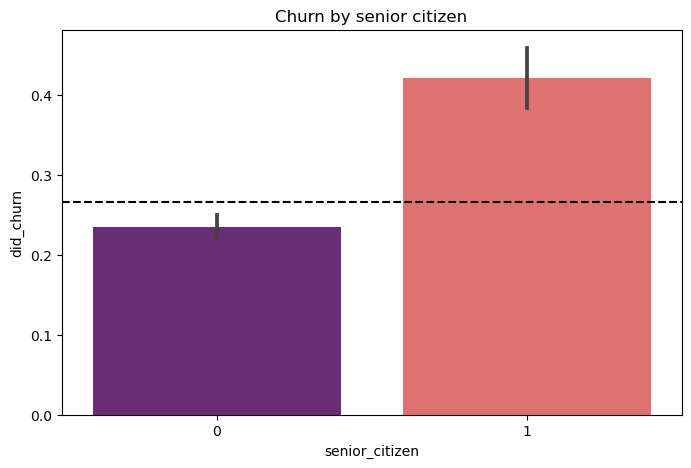

In [7]:
hypothesis_one_graph(train, target)

In [8]:
observed = pd.crosstab(train.senior_citizen, train[target])
observed

did_churn,0,1
senior_citizen,,
0,2522,773
1,375,273


In [9]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p
        

We reject the null hypothesis: Senior citizen and churn are independent of each other.
Therefore: Senior citizen an churn are dependent on each other.


1.2173782413917346e-22

### Hyothesis 2: 
1. Are customers more likley to churn due to contract type? <br>
$H_0$: Contract type and churn are independent of each other. <br>
$H_a$: Contract type an churn are dependent on each other. <br>

In [10]:
null_hypothesis = 'Contract type and churn are independent of each other.'
alternative_hypothesis = 'Contract type an churn are dependent on each other.'

In [11]:
def hypothesis_two_graph(train, target):
        
    print(f'contract type vs if they did churn')
    plt.figure(figsize=(8, 5))
    sns.barplot(data=train, x=train.contract_type, y=target, palette='viridis')
    plt.title(f'Churn by contract type')
    overall_rate = train[target].mean()
    plt.axhline(overall_rate, ls='--', color='black')
    plt.show()

contract type vs if they did churn


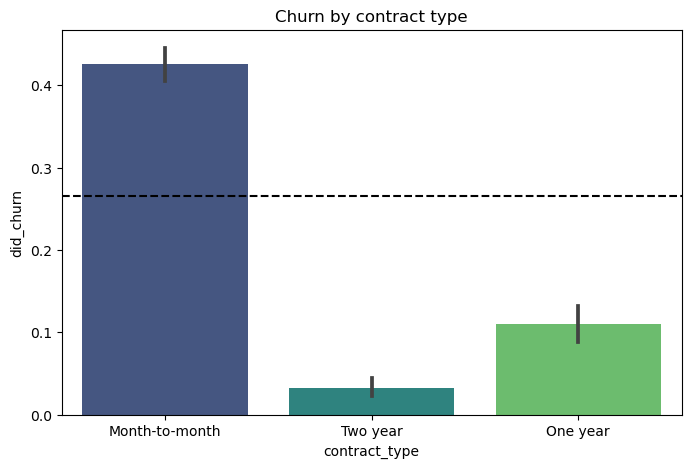

In [12]:
hypothesis_two_graph(train, target)

In [13]:
observed = pd.crosstab(train.contract_type, train[target])
observed

did_churn,0,1
contract_type,,
Month-to-month,1247,924
One year,735,91
Two year,915,31


In [14]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p
   

We reject the null hypothesis: Contract type and churn are independent of each other.
Therefore: Contract type an churn are dependent on each other.


5.086019119486488e-142

### Hypothesis 3: 
2. Are customer more likley to churn due to payment type? <br>
$H_0$: Payment type and churn are independent of each other. <br>
$H_a$: Payment type an churn are dependent on each other. <br>

In [15]:
null_hypothesis = 'Payment type and churn are independent of each other.'
alternative_hypothesis = 'Payment type an churn are dependent on each other.'

In [16]:
def hypothesis_three_graph(train, target):
        
    print(f'contract type vs if they did churn')
    plt.figure(figsize=(8, 5))
    sns.barplot(data=train, x=train.payment_type, y=target, palette='flare')
    plt.title(f'Churn by payment type')
    overall_rate = train[target].mean()
    plt.axhline(overall_rate, ls='--', color='black')
    plt.show()

contract type vs if they did churn


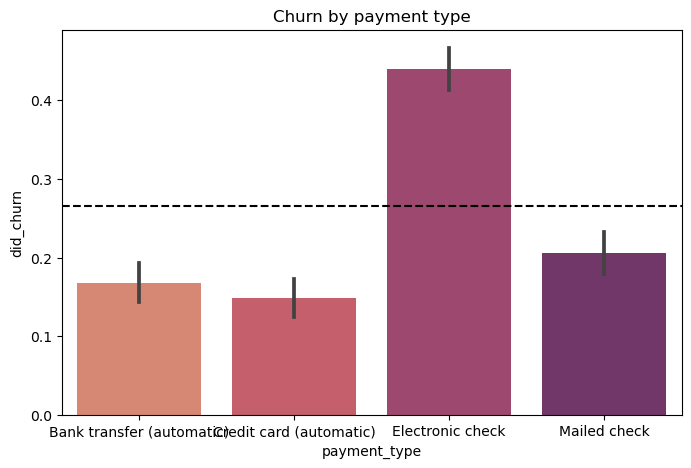

In [17]:
hypothesis_three_graph(train, target)

In [18]:
observed = pd.crosstab(train.payment_type, train[target])
observed

did_churn,0,1
payment_type,,
Bank transfer (automatic),712,143
Credit card (automatic),692,121
Electronic check,752,590
Mailed check,741,192


In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p
   

We reject the null hypothesis: Payment type and churn are independent of each other.
Therefore: Payment type an churn are dependent on each other.


3.877716949659107e-70

### Hypothesis 4: 
2. Are customer more likley to churn due to payment type? <br>
$H_0$: Monthly charges and churn are have no relationship. <br>
$H_a$: Monthly charges and churn are have a monotonic relationship <br>

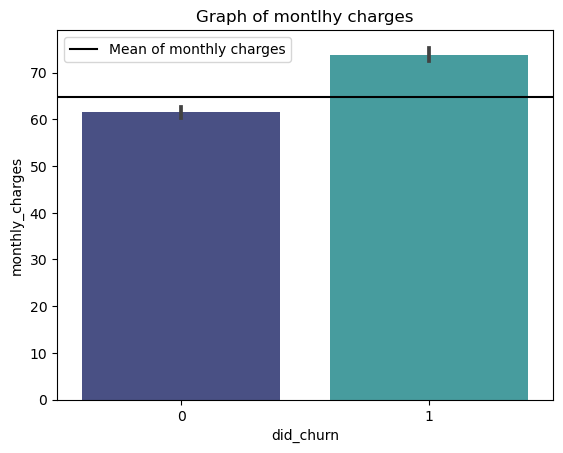

In [20]:
plt.title(f'Graph of montlhy charges')
sns.barplot(x = train.did_churn, y = train.monthly_charges, data = train, palette = 'mako')
col_mean = train.monthly_charges.mean()
plt.axhline(col_mean, label = (f'Mean of monthly charges'), color = 'black')
plt.legend()
    
plt.show()

In [21]:
stat, p_val = stats.mannwhitneyu(
    train[train.churn == 'No'].monthly_charges,
    train[train.churn == 'Yes'].monthly_charges)
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.


In [22]:
def eval_Spearmanresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")

In [23]:
r, p = stats.spearmanr(train.monthly_charges, train.churn)
eval_Spearmanresult(r, p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.174870.
P-value: 1.9067207252957424e-28


### Hypothesis 5: 
2. Are customer more likley to churn due to payment type? <br>
$H_0$: Internet type and churn are independent of each other. <br>
$H_a$: Internet type and churn are dependent on each other. <br>

In [24]:
null_hypothesis = 'Internet type and churn are independent of each other.'
alternative_hypothesis = 'Internet type and churn are dependent on each other.'
observed = pd.crosstab(train.payment_type, train[target])
observed

did_churn,0,1
payment_type,,
Bank transfer (automatic),712,143
Credit card (automatic),692,121
Electronic check,752,590
Mailed check,741,192


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05
if p < alpha:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"Therefore: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null, therefore: {null_hypothesis}")
p
   

We reject the null hypothesis: Internet type and churn are independent of each other.
Therefore: Internet type and churn are dependent on each other.


3.877716949659107e-70